<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/P12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Age', 'Discount Availed', 'Customer Tenure (Years)']]
y = df['Total Spent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 23295.782426848284
R2 Score: 0.2528746838605449


                        Comments  Sentiment
0     Satisfied with the service       0.50
1  Needs improvement in delivery       0.00
2               Regular customer       0.00
3               Occasional buyer       0.00
4                   High spender       0.16


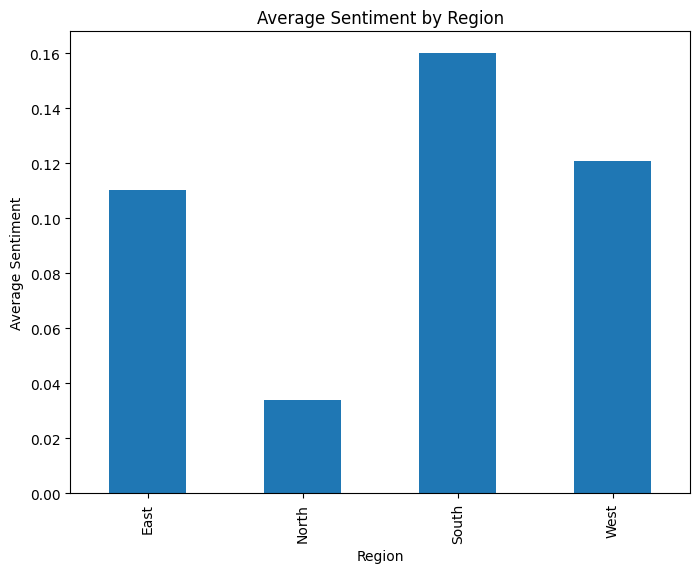

In [5]:
from textblob import TextBlob
import matplotlib.pyplot as plt

df['Sentiment'] = df['Comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['Comments', 'Sentiment']].head())


average_sentiment = df.groupby('Region')['Sentiment'].mean()
average_sentiment.plot(kind='bar', title='Average Sentiment by Region', figsize=(8, 6))
plt.ylabel('Average Sentiment')
plt.show()

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df[['Age', 'Discount Availed', 'Website Visit Frequency', 'Average Cart Value']]
y = df['Converted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:41:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8333333333333334


In [7]:
from sklearn.ensemble import RandomForestRegressor


X = df[['Customer Tenure (Years)', 'Website Visit Frequency', 'Discount Availed']]
y = df['Total Spent']


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


                   Feature  Importance
2         Discount Availed    0.423502
1  Website Visit Frequency    0.322711
0  Customer Tenure (Years)    0.253787


In [8]:
import plotly.express as px


fig = px.scatter_3d(
    df,
    x='Total Spent',
    y='Discount Availed',
    z='Average Cart Value',
    color='Region',
    title='3D Visualization of Regional Spending',
    labels={'x': 'Total Spent', 'y': 'Discount Availed', 'z': 'Average Cart Value'}
)
fig.show()

In [9]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Total Spent',
    y='Customer Tenure (Years)',
    z='Average Cart Value',
    color='Region',
    title='3D Scatter Plot of Spending vs Tenure',
    labels={'x': 'Total Spent', 'y': 'Tenure', 'z': 'Cart Value'}
)
fig.show()

In [10]:
import plotly.graph_objects as go
import numpy as np


z_data = df.pivot_table(values='Total Spent', index='Region', columns='Income Level', aggfunc='mean').fillna(0).values

fig = go.Figure(data=[go.Surface(z=z_data)])
fig.update_layout(title='3D Surface Plot of Spending by Region and Income Level')
fig.show()

In [11]:
fig = px.line_3d(
    df,
    x='Customer Tenure (Years)',
    y='Total Spent',
    z='Discount Availed',
    color='Region',
    title='3D Line Plot of Spending Over Customer Tenure'
)
fig.show()

In [12]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Total Spent',
    z='Discount Availed',
    size='Average Cart Value',
    color='Region',
    title='3D Bubble Chart of Spending by Age and Discounts'
)
fig.show()

In [13]:
fig = px.density_contour(
    df,
    x='Total Spent',
    y='Average Cart Value',
    z='Discount Availed',
    color='Region',
    title='3D Density Contour of Spending and Cart Value'
)
fig.show()

In [14]:
fig = px.density_heatmap(
    df,
    x='Total Spent',
    y='Discount Availed',
    z='Average Cart Value',
    color_continuous_scale='Viridis',
    title='3D Heatmap of Spending and Discounts'
)
fig.show()

In [15]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Mesh3d(
    x=df['Total Spent'],
    y=df['Discount Availed'],
    z=df['Average Cart Value'],
    opacity=0.5,
    color='blue'
))

fig.update_layout(
    title='3D Histogram of Spending, Discounts, and Cart Value',
    scene=dict(
        xaxis_title='Total Spent',
        yaxis_title='Discount Availed',
        zaxis_title='Average Cart Value'
    )
)

fig.show()


In [16]:
import numpy as np


x = df['Income Level'].astype(str)
y = df['Total Spent']
z = df['Discount Availed']

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8)
))

fig.update_layout(
    title='3D Scatter as Violin Representation',
    scene=dict(
        xaxis_title='Income Level',
        yaxis_title='Total Spent',
        zaxis_title='Discount Availed'
    )
)

fig.show()


In [17]:
fig = go.Figure()

for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    fig.add_trace(go.Scatter3d(
        x=[region] * len(region_data),
        y=region_data['Average Cart Value'],
        z=region_data['Discount Availed'],
        mode='markers',
        name=region
    ))

fig.update_layout(
    title='3D Box Plot of Cart Value by Region',
    scene=dict(
        xaxis_title='Region',
        yaxis_title='Average Cart Value',
        zaxis_title='Discount Availed'
    )
)

fig.show()

In [18]:
import plotly.graph_objects as go


fig = go.Figure()


for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    fig.add_trace(go.Scatter3d(
        x=region_data['Income Level'],
        y=[region] * len(region_data),
        z=region_data['Total Spent'],
        mode='markers+lines',
        marker=dict(size=10, opacity=0.8),
        name=region
    ))


fig.update_layout(
    title='3D Bar Chart of Spending by Region and Income Level',
    scene=dict(
        xaxis_title='Income Level',
        yaxis_title='Region',
        zaxis_title='Total Spent'
    )
)

fig.show()